In [1]:
import tensorflow as tf

In [15]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test)=mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
X_train.shape

(60000, 28, 28)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy',
)

In [20]:
r = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2896 - accuracy: 0.9152 - val_loss: 0.1295 - val_accuracy: 0.9614
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1402 - accuracy: 0.9582 - val_loss: 0.0948 - val_accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1058 - accuracy: 0.9685 - val_loss: 0.0824 - val_accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0860 - accuracy: 0.9730 - val_loss: 0.0764 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0742 - accuracy: 0.9771 - val_loss: 0.0736 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0655 - accuracy: 0.9793 - val_loss: 0.0724 - val_accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0581 - accuracy: 0.9815 - val_loss: 0.0764 - val_accuracy:

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 969    0    2    2    1    0    3    1    2    0]
 [   0 1127    2    1    0    1    2    0    2    0]
 [   4    2 1012    1    3    0    2    4    4    0]
 [   0    0    4  992    0    3    0    6    4    1]
 [   0    0    1    0  966    0    7    0    2    6]
 [   2    0    0    8    2  864    9    0    5    2]
 [   1    2    0    1    1    4  948    0    1    0]
 [   3    6   12    1    0    0    0  999    2    5]
 [   2    1    1    4    3    2    3    2  952    4]
 [   2    3    0    7    7    1    1    6    7  975]]


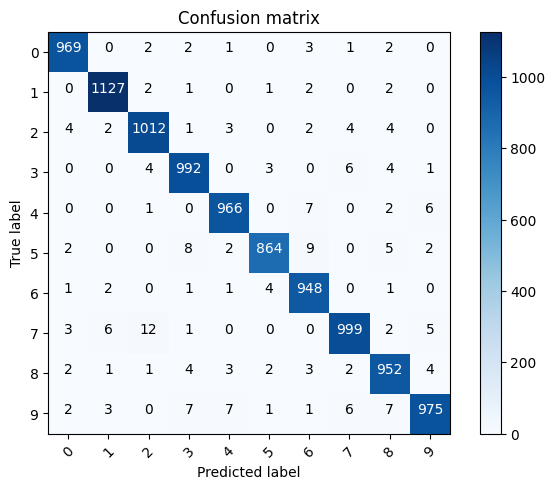

In [23]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.


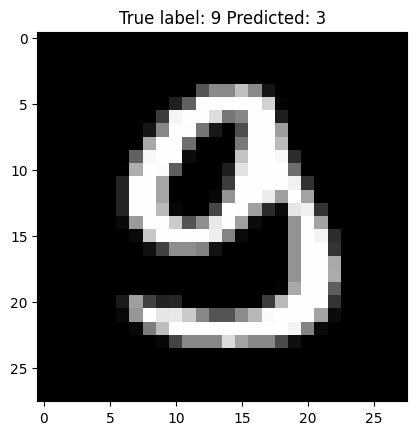

In [25]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));